# Introduction

In this notebook I cover the basic theory and implementation of a PID control.

The notebook will be divided into following sections:
    1) Dynamic behaviour of first and second order systems.
    2) Typical responses of PID control systems.
    3) Stability of closed loop control systems.
    4) PID controller Design and tuning.
    5) Shortcomings of a PID controller.

# Setting up MathJax for numbering

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [2]:
%%javascript
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

# Dynamic behaviour of first and second order systems

As a starting point, let us analyse the dynamics of a first order system

A first order system with state $y$ and input $u$ in standard form is written as:

\begin{equation}
\tau \frac{dy(t)}{dt} + y(t) = k u(t), \label{eq:standard}
\end{equation}

where $\tau$ is known as the time-constant and $k$ is known as the gain of the system. Moving forward, we simplify the notation and write $y(t)$ and $u(t)$ as $y$ and $u$ respectively.

The parameter $k$ is known as the gain of the system because 1 unit change in $u$ produces $k$ units of change in $y$ at steady state. Steady state is defined as the state when $y$ becomes steady (constant).

To see this we simulate system \ref{eq:standard} with the parameter values $\tau = 1, k = 2$ and the following control input:

\begin{equation}
u =
\begin{cases}
      0, & \text{if}\ t < 0 \\
      1, & \text{if}\ t \geq 0
    \end{cases}
\end{equation}

Text(0, 0.5, 'u(t)')

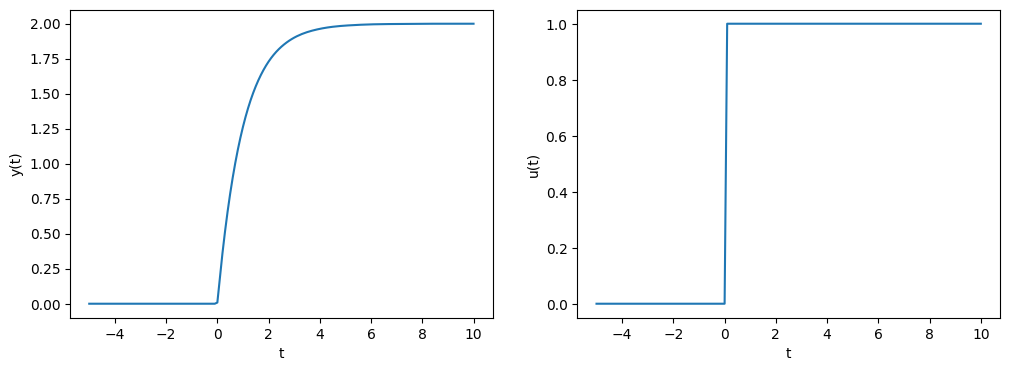

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

def u(t):
    return np.where(t < 0, 0, 1) 

tau = 1
k = 2
F = lambda t, y: (-y + k*u(t)) / tau

t_eval = np.arange(-5, 10.1, 0.1)
sol = solve_ivp(F, [-5, 10], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')

plt.subplot(122)
plt.plot(sol.t, u(sol.t))
plt.xlabel('t')
plt.ylabel('u(t)')

Observe that in t = 1 unit, $y$ attains 63% of its final value. In t = 3 units, 95% of its final value and in t = 5 units, 99.3% of its final value. Since time can be normalized by $\tau$, this phenomena can be expected in $\tau$ units when $\tau \neq 1$. The steady state value of y is twice the steady state vlaue of $u$.

NOTE: To analyse the behaviour of a system at steady state, set all time derivative terms to zero. 

In the case of system \ref{eq:standard}, 
$$
y_s = k u_s,
$$
where the subscripts s denote the steady state values.

## Canonical form

In cannonical form, system \ref{eq:standard} is written as

\begin{equation}
\frac{dy}{dt} = a y + b u \label{eq:canonical}
\end{equation}

where $a = 1/\tau$ and $b = k/ \tau$. 

In general, the canonical form for a $n^{th}$ order linear dynamical system is written as:

\begin{equation}
    \frac{d\mathbf{y}}{dt} = A \mathbf{y} + B \mathbf{u} \label{eq:n_canonical},
\end{equation}

where $\mathbf{y}$ is a $n$ dimensional state vector, $\mathbf{u}$ is a $m$ dimensional input vector. $A$ is a $n\times n$ matrix and $B$ is a $n \times m$ matrix.

Any $n^{th}$ order differential equation can be converted into cannonical form.

For example, take the case of a harmonic oscillator with damping:

\begin{equation}
    \frac{d^2 x}{dt^2} = - k x - \eta \frac{dx}{dt} + b u, \label{eq:harmonic}
\end{equation}

where $x$ is the position of the oscilator, $k$ is the harmonic constant, and $\eta$ is the drag co-efficient.

Equation \ref{eq:harmonic} can be written in canonical form as:

\begin{equation}
\frac{d}{dt} \begin{bmatrix} x\\v \end{bmatrix}=
    \begin{bmatrix} 0&1\\-k&-\eta \end{bmatrix}
 \begin{bmatrix} x\\v \end{bmatrix}
 + \begin{bmatrix} 0\\b \end{bmatrix} u. \label{eq:harmonic_canonical}
\end{equation}

The harmonic oscillator is considered a linear system, and linear systems can always be written into a canonical form.
Recall, a system $\mathcal{L}$ is considered linear iff
$$
\mathcal{L}(y_1 + y_2) = \mathcal{L}(y_1) + \mathcal{L}(y_2) 
$$

## Stable and Unstable systems

A system is called stable when a small disturbace to the state $y$ decreases and goes to zero with time. 

Correspondinly, a system is called unstable when a small disturbance to the state $y$ does not go to zero. 

In \ref{eq:canonical}, the system will be stable when $a < 0$ and unstable when $a>= 0$.We can directly observe this when we integrate \ref{eq:standard} to obtain

\begin{equation}
    y(t) = e^{at} y(0) + b \int_0^t e^{a(t-t')} u(t') dt \label{eq:integral}.
\end{equation}

Here $y(0)$ is the initial state of the system. 

To understand this clearer, take $y(0) = 0$, $b = 1$ and let $u(t)$ be

\begin{equation}
u (t) =
\begin{cases}
        0, & \text{if}\ t \leq 0 \\
      \epsilon, & \text{if}\ 0<t < \delta \\
      0, & \text{if}\ t \geq \delta.
    \end{cases}
\end{equation}.

Equation \ref{eq:integral} then simplifies to

\begin{equation}
    y(t) = 
    \begin{cases}
        0, & \text{if}\ t \leq 0 \\
      (e^{at} - 1) \; \epsilon/a, & \text{if}\ 0<t < \delta \\
      e^{at} ( 1 - e^{a\delta}) \;{\epsilon}/{a}, & \text{if}\ t \geq \delta. \label{eq:stable}
    \end{cases}
\end{equation}

The concept of stability is perfectly captured in \ref{eq:stable}. 
No matter how small the values of $\epsilon$ and $\delta$ a.k.a. the disturbance, the stability of the system is determined by sign of a.

For an $n^{th}$ order system \ref{eq:n_canonical}, the system is considered stable when all the eigenvalues of $A$ are negative. The system is unstable when atleast one eigenvalue of $A$ is non-negative.

To prove this, we transform \ref{eq:n_canonical} into n independant $1^{st}$ order systems.

Using eigendecompsotion of a matrix (https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix), 

$$A = Q\Lambda Q^{-1},$$

where $\Lambda$ is (mostly) a diagonal matrix containing the eigenvalues of $A$. $Q$ are the corresponding eigenvectors of $A$

Define a new co-ordinate space $z$ such that
$$z = Q^{-1}y$$

Equation \ref{eq:n_canonical} then transforms to

\begin{equation}
    \frac{dz}{dt} = \Lambda z + Q^{-1}B u \label{eq:transform}.
\end{equation}

Equation \ref{eq:transform} can be written into n first order equations of the form

\begin{equation}
    \frac{dz_i}{dt} = \lambda_i z_i + b_i u_i,
\end{equation}

where the sub-script $i$ denotes the $i^{th}$ entry of \ref{eq:transform}. $\lambda_i$ is the $i^{th}$ eigenvalue of $A$.

# References

[1] https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix

In [5]:
%%javascript
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>